#07 - Wizualizacja danych (zasady)

## W tym rozdziale

Omówiliśmy już podstawy **tworzenia** wizualizacji danych przy użyciu `pyplot` i `seaborn`.

W tym rozdziale omówimy niektóre **zasady** wizualizacji danych.

- **Taksonomia typów wykresów**: jakiego wykresu użyć, kiedy?
   - To tylko ogólny przewodnik - kontekst zawsze ma znaczenie.
- **Zasady** i **czego unikać**. 
- Dodatkowe uwagi.

In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Taksonomia wykresów

### Przewodnik: którego wykresu użyć i kiedy?

| Ile zmiennych? | Rodzaj zmiennej? | Wykres | `seaborn` |
| ------------------- | ----------------------- | ---------- | --------------- |
| 1 | Ciągła | Histogram | `seaborn.histplot`|
| 1 | Kategoryczna | Count plot | `seaborn.countplot`|
| 2 | Ciągła `x`, ciągła `y` | Scatter, liniowy | `seaborn.relplot`|
| 2 | Kat. `x`, ciągła `y` | Bar, box, strip | `seaborn.catplot`|

### Co z $>2$ zmiennymi?

Zależy to od **rodzaju** zmiennych.

Z grubsza:

- 2 ciągłe, 1 kategoryczna: `seaborn.relplot` z `hue`
- 2 kategoryczne, 1 ciągła: `seaborn.catplot` z `hue`
- 3 ciągłe: `seaborn.relplot` z `size` lub `hue`


## Zasady i **czego unikać**

- W tej sekcji zaproponujemy i omówimy możliwe *zasady* tworzenia lepszych wizualizacji.
- Wiele z tych zasad jest *zależnych od kontekstu* i nie bez sporów.

Ta sekcja jest ściśle wzorowana na [Rozdziale 1 Wizualizacji danych Kierana Healy'ego](https://socviz.co/lookatdata.html#why-look-at-data).

### Co składa się na dobrą wizualizację?

W [The visual display of quantitative information](https://www.edwardtufte.com/tufte/books_vdqi), Edward Tufte argumentuje:

> Doskonałość graficzna to dobrze zaprojektowana prezentacja interesujących danych - kwestia treści, statystyki i projektu ... [To] **składa się ze złożonych pomysłów przekazanych z jasnością, precyzją i wydajnością** ... [To] jest to, co daje widzowi największą liczbę pomysłów w najkrótszym czasie przy najmniejszej ilości atramentu na najmniejszej przestrzeni ... [To] jest prawie zawsze wielowymiarowe ... A doskonałość graficzna wymaga mówienia prawdy o danych. (Tufte, 1983, s. 51).

To prawda, ale także bardzo ogólna - czy możemy być bardziej konkretni?

### Różne rodzaje złego wykresu?

Socjolog [Kieran Healy](https://kieranhealy.org/) wskazuje, że wykresy mogą być „złe” na różne sposoby:

1. *Estetyczne*: projekt wykresu jest estetycznie nieatrakcyjny.
2. *Merytoryczne*: albo dane, albo ich prezentacja (albo jedno i drugie) mają fundamentalne problemy. 
3. *Percepcyjne*: wykres jest mylący ze względu na sposób, w jaki ludzie postrzegają i przetwarzają to, na co patrzą.

### Zły gust

Wiele wykresów ma cechy estetyczne, które są *zbyt złożone*, biorąc pod uwagę to, co próbują przekazać.

- **Wykresy słupkowe 3D** pomimo braku potrzeby stosowania trzech wymiarów. 
- Inne cechy estetyczne, takie jak cień. 

Cechy te mogą niepotrzebnie „skomplikować” wykres, **utrudniając jego interpretację**.

#### Zbyt złożony wykres

![title](img/life-expectancy.png)

#### Zasada 1: Maksymalizacja stosunku danych do tuszu

- Jedną z sugestii jest **maksymalizacja stosunku danych do tuszu**.
- Nie dodawaj elementów estetycznych, chyba że *przekazują informacje*.  

Istnieją jednak dowody na to, że *niektóre* estetycznie złożone figury są *łatwiejsze do zapamiętania*. Więc to zależy!

### Złe dane

Żadna ilość eleganckiej estetyki nie zrekompensuje złych danych! 

Healy posługuje się [przykładem wykresu z New York Times](https://socviz.co/lookatdata.html#why-look-at-data). Ten wykres jest **wprowadzający w błąd**:

- Oś „x” sugeruje tych samych ludzi w różnym czasie, podczas gdy w rzeczywistości są to ludzie w różnym *wieku* w tym samym czasie.
- O osi „y”: sugeruje pytanie „tak/nie”, podczas gdy jest to podzbiór odpowiedzi na 10-punktowej skali.

#### Zasada 2: Bądź wierny(a) danym

Wizualizacja powinna przedstawiać *to, co mierzą dane*.

(Ta zasada nie jest tak naprawdę zależna od kontekstu! Zawsze bądź wierny(a) danym).

### Zła percepcja

Wreszcie, wykresy mogą być **wprowadzające w błąd**, ponieważ ich estetyka sugeruje coś *nieprawidłowego* na temat danych.

> Wizualizacje kodują liczby za pomocą linii, kształtów i kolorów. Oznacza to, że nasza interpretacja tych kodowań jest częściowo uzależniona od tego, jak ogólnie postrzegamy kształty geometryczne i relacje.  (Healy, [Data Visualization](https://socviz.co/lookatdata.html#why-look-at-data)).

#### Wykresy słupkowe i zasada proporcjonalnego atramentu

Kluczową cechą *estetyczną* wykresów słupkowych jest **ilość atramentu** poświęcona słupkowi.

- Jako widzowie, nasze oczy mierzą **względną różnicę** w ilości miejsca przeznaczonego na każdy słupek.
- Większe różnice percepcyjne oznaczają większe **różnice wielkości**. 

Zasada ta może zostać **naruszona** na kilka sposobów.

##### Obcięta oś y wyolbrzymia różnice

![title](img/average_hours.png)

[Źródło: Calling Bullshit](https://www.callingbullshit.org/tools/tools_misleading_axes.html)


##### Słupki powinny mieć jednakową szerokość

![title](img/proportional_ink.png)

[Źródło: Witte and Witte](https://www.wiley.com/en-us/Statistics,+11th+Edition-p-9781119254515).

#### Kiedy *nie* zaczynać od zera?

- Wykresy słupkowe powinny zaczynać się od zera.
- Jednak w wielu przypadkach rozpoczęcie od zera może być mylące. 
   - W przypadku wykresów liniowych celem jest pokazanie **względnej różnicy w *pozycji***.
   - Przy bardzo dużych wartościach osi `y`, rozpoczęcie od zera może być mylące.

##### Kiedy liczy się zmiana względna (cz. 1)

Ten wykres pokazuje zmiany `temperatury` (Celsjusza) w ciągu `roku` i zaczyna się od 0.

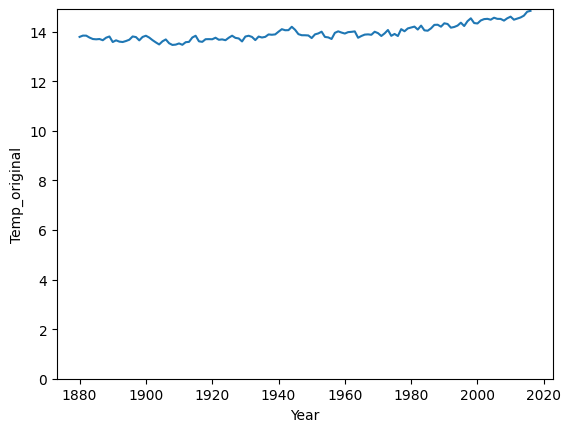

In [1]:
import numpy as np
df_temp = pd.read_csv("data/viz/temp.csv")
# Zamiana wartości nieskończoności na NaN
df_temp = df_temp.replace([np.inf, -np.inf], np.nan)
# Usunięcie wierszy z NaN (opcjonalne, jeśli potrzebne)
df_temp = df_temp.dropna()

sns.lineplot(data=df_temp, x='Year', y='Temp_original')
plt.ylim(0)
plt.show()

**Dlaczego to ważne?**

1. Zasada proporcjonalnego atramentu: Wykresy powinny być wierne danym i nie wprowadzać w błąd. Rozpoczęcie osi y od zera zapobiega wyolbrzymianiu różnic między wartościami.
2. Porównanie percepcji: Wykresy z różnymi ustawieniami osi y mogą prowadzić do różnych wniosków, co jest kluczowe w kontekście wizualizacji danych.

##### Kiedy liczy się zmiana względna (pkt. 2)

Ten wykres pokazuje zmiany `temperatury` (Celsjusza) w ciągu `roku`, ale nie zaczyna się od 0.

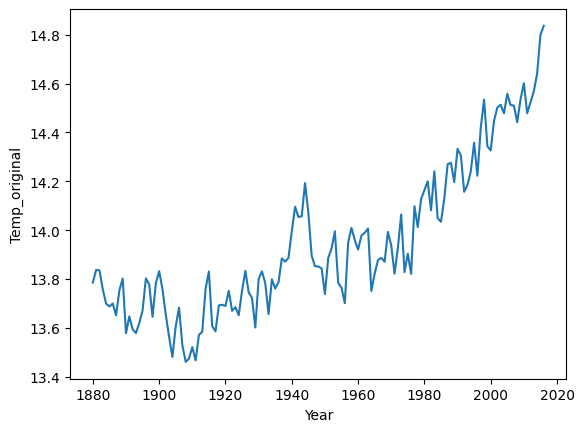

In [2]:
sns.lineplot(data = df_temp, x = 'Year', y = 'Temp_original');

### Podsumowanie: zasady i praktyka

Omówiliśmy kilka zasad (i odpowiadających im *praktyk, których należy unikać*):

1. **Zasada 1**: Maksymalizacja stosunku danych do tuszu.
2. **Zasada 2**: Wierność danym. 
3. **Zasada 3**: Bądź wierny temu, co sugeruje *logika wizualna* wykresu.

## Dodatkowe uwagi

Wizualizacja danych mogłaby stanowić cały kurs (lub [podręcznik](https://socviz.co/lookatdata.html#why-look-at-data)). 

Istnieje jednak kilka innych wspólnych kwestii do omówienia:

- Czy powinienem pokazać *średnią* (lub medianę itp.) czy *surowe dane*?
- Czy powinienem wykluczyć wartości odstające?
- Czy powinienem *przekształcić* moje dane (np. do skali logarytmicznej)?

### Czy pokazać „surowe dane”?

Wszystkie miary **tendencji centralnej** (np. `średnia`, `mediana`) są *uproszczeniem* naszych danych.

- Dlatego pokazanie tylko średniej „ukrywa” wiele danych.  
- Jeśli jednak „średnia” jest tym, na czym ci zależy, surowe dane mogą być zbyt złożone.

Osobiście staram się pokazywać *surowe dane* tam, gdzie to możliwe - wraz ze średnią.

#### Wyświetlanie *zarówno* podsumowania, jak i surowych danych

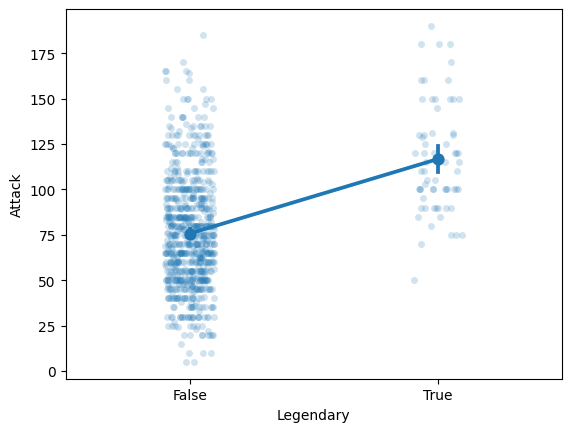

In [4]:
df_pokemon = pd.read_csv("data/pokemon.csv")
sns.stripplot(data = df_pokemon, x = "Legendary", y = "Attack", alpha = .2);
sns.pointplot(data = df_pokemon, x = "Legendary", y = "Attack");

### Czy wykluczyć wartości odstające?

> Wartości odstające** to punkty danych, które znacznie różnią się od innych punktów w rozkładzie.

Uwzględnienie wartości odstających w wizualizacji może być mylące.

- Wydłużają one oś, mimo że nie są reprezentatywne dla danych.
- Mogą odwracać uwagę od głównego punktu, który chcesz przekazać.

**Czy należy je usunąć?**

#### Przejrzystość w kwestii wykluczenia

- Ta kwestia jest bardzo zależna od kontekstu.  
- Osobiście *zwykle* nie wykluczam wartości odstających. 
- Ale jeśli je wykluczasz, **bądź bardzo jasny co do swojej decyzji**.
   - Idealnie byłoby, gdyby decyzja ta została „zarejestrowana” z wyprzedzeniem.
   
W kolejnych rozdziałach omówimy, jak zdefiniować/wykryć wartości odstające za pomocą [**z-scores**](https://en.wikipedia.org/wiki/Standard_score).

### Czy przekształcić dane?

Czasami „surowe” dane są mocno wypaczone.

- **Transformacja logarytmiczna** może sprawić, że *prawidłowo przekrzywione* dane będą wyglądać bardziej [„normalnie”](https://en.wikipedia.org/wiki/Normal_distribution). 
- Kiedy jest to dobry lub zły pomysł?

#### Dane prawoskośne mogą być mylące

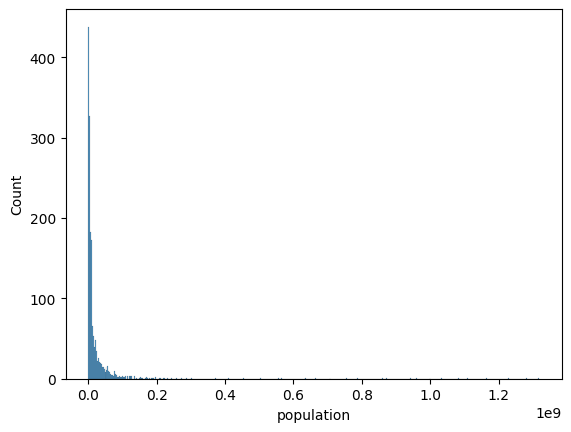

In [7]:
df_gapminder = pd.read_csv("data/viz/gapminder_full.csv")
sns.histplot(data = df_gapminder, x = 'population');

#### Przekształcenia logarytmiczne sprawiają, że wygląda to bardziej normalnie.

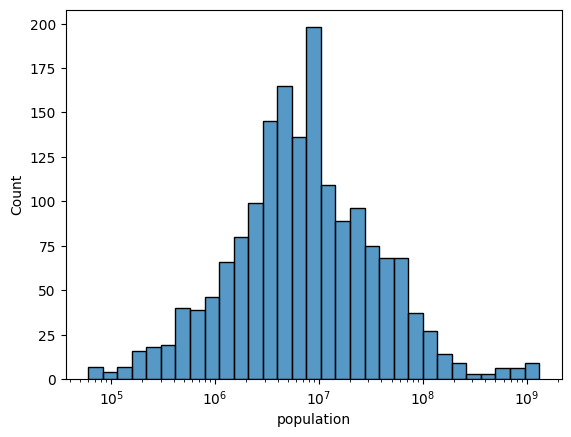

In [8]:
sns.histplot(data = df_gapminder, x = 'population', log_scale=True);

#### Ale co jest „prawidłowe”?

Rozważania, o których należy pamiętać:

- Czy istnieją powody, by sądzić, że ta zmienna **skaluje się logarytmicznie**?
- Czy istnieją powody, by sądzić, że związek tej zmiennej z *innymi zmiennymi* **skaluje się logarytmicznie**?
- Czy będę prezentować tę liczbę publiczności, która **rozumie skalowanie logarytmiczne**? 

Pod względem *interpretacji*:

- Skala logarytmiczna implikuje **wielokrotne/względne** zmiany.
- Skala liniowa oznacza **dodatnie/absolutne** zmiany.

## Podsumowanie

Wizualizacja danych jest *centralnym* elementem analizy danych. 

W tym rozdziale skupiliśmy się na *pakietach* (`seaborn` i `pyplot`), jak również na *zasadach*, o których należy pamiętać.

Więcej informacji można znaleźć na stronie:

- [Calling Bullshit](https://www.callingbullshit.org/syllabus.html#Visual).
- [Data Visualization](https://socviz.co/lookatdata.html#why-look-at-data). 
- [How to lie with statistics](https://en.wikipedia.org/wiki/How_to_Lie_with_Statistics).
- [Wizualne wyświetlanie informacji ilościowych](https://www.edwardtufte.com/tufte/books_vdqi).
- [Python 4 Data Science - wizualizacja](https://byuidatascience.github.io/python4ds/data-visualisation.html).
